In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import ensemble
import xgboost as xgb
from numpy import loadtxt
from keras.utils.vis_utils import plot_model
import pydot
from sklearn.decomposition import PCA


In [20]:
def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [21]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        if(Y_test[i]!= 0 ):
            error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
        
    error = error/ len(Y_test)
    return error

In [26]:
def create_model(input_dim):
    dnn= Sequential()
    dnn.add(Dense(128, input_dim = input_dim, activation='relu'))
    # dnn.add(Dropout(0.2))
    dnn.add(Dense(128, activation='relu'))
    # dnn.add(Dropout(0.2))
    dnn.add(Dense(128, activation='relu'))
    # dnn.add(Dropout(0.2))
    dnn.add(Dense(2, activation='linear'))
    # print('Model : DNN', dnn.summary())
    return dnn

# MSER

430 52
(430, 16) (52, 16) (430, 2) (52, 2)
(5, 16) (47, 16) (5, 2) (47, 2)
(430, 16) (430, 2) (5, 16) (5, 2) (47, 16) (47, 2)
Fitting Model-----------
<keras.layers.core.Dense object at 0x000000366DA04748> False
<keras.layers.core.Dense object at 0x000000366DE640F0> False
<keras.layers.core.Dense object at 0x000000366DE647F0> True
<keras.layers.core.Dense object at 0x000000366F295C88> True
Fine Tuning----------


C:\Users\Rajat\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


MSE: 
 563255.3915363326

R2: 
 0.38655006581320456

MAPE Runtime: 
 0.14206005886033302

MAPE Power: 
 0.452258864316591


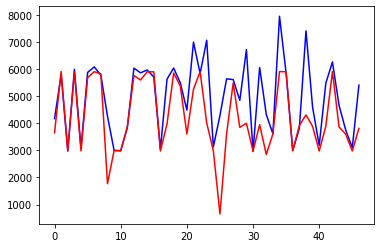

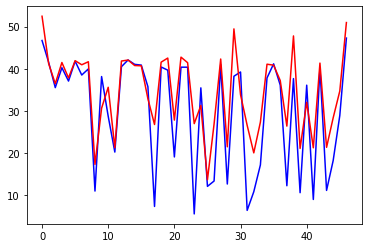

In [27]:
all_datasets = 'C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Dataset\\'
dataset_name_n = all_datasets +  'mser_physical' + '.csv'
dataset_name = all_datasets +  'mser_simulated' + '.csv'

df = pd.read_csv(dataset_name)
dfn = pd.read_csv(dataset_name_n)


print(len(df),len(dfn))

encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)
encoded_data_frame_n, encoder_isa_n, encoder_mem_type_n = encode_text_features('encode', dfn, encoder_isa = None, encoder_mem_type=None)

total_data_n = encoded_data_frame_n.drop(columns = ['arch','mem-type_1','mem-type_2','mem-type_3','mem-type_4',
                                                        'isa_1','isa_2' ,'isa_3', 'isa_4', 'bus_speed', 'num-cpu'])
total_data = encoded_data_frame.drop(columns = ['arch','mem-type_1','mem-type_2','mem-type_3','mem-type_4','isa_1',
                                                    'isa_2'])
total_data = total_data.fillna(0)
total_data_n = total_data_n.fillna(0)

X_sim = total_data.drop(columns = ['runtime', 'power']).to_numpy()
Y_sim = total_data[['runtime','power']].to_numpy()
X_phy = total_data_n.drop(columns = ['runtime', 'power']).to_numpy()
Y_phy = total_data_n[['runtime','power']].to_numpy()

print(X_sim.shape, X_phy.shape, Y_sim.shape, Y_phy.shape)

# Separating Physical data to 10% and 90%
X_train_phy, X_test_phy, Y_train_phy, Y_test_phy = train_test_split(X_phy, Y_phy, test_size = 0.90, random_state = 0)
print(X_train_phy.shape, X_test_phy.shape, Y_train_phy.shape, Y_test_phy.shape)

'''X_train_sim = np.append(X_sim, X_train_phy,axis = 0)
Y_train_sim = np.append(Y_sim, Y_train_phy,axis = 0)
print(X_train_sim.shape, Y_train_sim.shape, X_test_phy.shape, Y_test_phy.shape)'''

scaler_X_sim = StandardScaler()
scaler_X_phy = StandardScaler()
scaler_X_sim.fit(X_sim)
scaler_X_phy.fit(X_phy)
X_sim = scaler_X_sim.fit_transform(X_sim)
X_train_phy = scaler_X_phy.transform(X_train_phy)
X_test_phy = scaler_X_phy.transform(X_test_phy)

scaler_Y_sim = StandardScaler()
scaler_Y_phy = StandardScaler()
scaler_Y_sim.fit(Y_sim)
scaler_Y_phy.fit(Y_phy)
# Y_sim = np.reshape(Y_sim, (len(Y_sim),1))
# Y_test_phy = np.reshape(Y_test_phy, (len(Y_test_phy),1))
# Y_train_phy = np.reshape(Y_train_phy, (len(Y_train_phy),1))                   
Y_sim = scaler_Y_sim.transform(Y_sim)
Y_test_phy = scaler_Y_phy.fit_transform(Y_test_phy)
Y_train_phy = scaler_Y_phy.transform(Y_train_phy)


print(X_sim.shape, Y_sim.shape, X_train_phy.shape, Y_train_phy.shape, X_test_phy.shape, Y_test_phy.shape)

'''X_train = X_train_sim
X_test = X_test_phy
Y_train = Y_train_sim
Y_test = Y_test_phy
print('Final Shapes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)'''

model = create_model(input_dim = X_sim.shape[1])
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
print('Fitting Model-----------')
model.fit(X_sim, Y_sim, epochs = 100, batch_size = 5, verbose = 0)
# Freeze the layers except the last 2 dense layers
for layer in model.layers[:-2]:
    layer.trainable = False
    print(layer)

# Check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)
print('Fine Tuning----------')    
model.fit(X_train_phy, Y_train_phy, epochs = 100, batch_size = 5, verbose = 0)    
Y_pred = model.predict(X_test_phy)
'''plt.plot(Y_pred)
plt.plot(Y_test_phy)'''
Y_fold = scaler_Y_phy.inverse_transform(Y_test_phy)
Y_pred = scaler_Y_phy.inverse_transform(Y_pred)

plt.figure()
plt.plot(Y_fold[:,0], 'b')
plt.plot(Y_pred[:,0], 'r')
plt.figure()
plt.plot(Y_fold[:,1], 'b')
plt.plot(Y_pred[:,1], 'r')

'''
plt.figure()
plt.plot(Y_fold, 'b')
plt.plot(Y_pred, 'r')
'''
r2_scores = (r2_score(Y_fold, Y_pred))
# mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores_runtime = (absolute_percentage_error(Y_fold[:,0], Y_pred[:,0]))
mape_scores_power = (absolute_percentage_error(Y_fold[:,1], Y_pred[:,1]))
# mape_scores_power = (absolute_percentage_error(Y_fold, Y_pred))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE Runtime: \n', mape_scores_runtime)
print('\nMAPE Power: \n', mape_scores_power)

# Tracking

425 52
(425, 16) (52, 16) (425, 2) (52, 2)
(5, 16) (47, 16) (5, 2) (47, 2)
(425, 16) (425, 2) (5, 16) (5, 2) (47, 16) (47, 2)
Fitting Model-----------
<keras.layers.core.Dense object at 0x000000366DE64470> False
<keras.layers.core.Dense object at 0x000000366E2AD320> False
<keras.layers.core.Dense object at 0x000000366E2AB9E8> True
<keras.layers.core.Dense object at 0x0000003670927320> True
Fine Tuning----------


C:\Users\Rajat\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


MSE: 
 563255.3915363326

R2: 
 0.31947914276391237

MAPE Runtime: 
 0.11819255220408052

MAPE Power: 
 0.31027177862739475


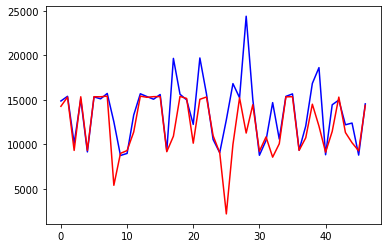

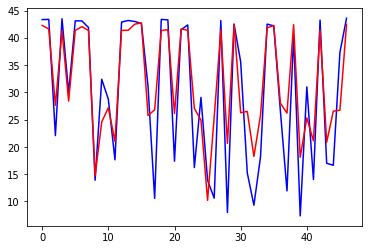

In [28]:
all_datasets = 'C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Dataset\\'
dataset_name_n = all_datasets +  'tracking_physical' + '.csv'
dataset_name = all_datasets +  'tracking_simulated' + '.csv'

df = pd.read_csv(dataset_name)
dfn = pd.read_csv(dataset_name_n)


print(len(df),len(dfn))

encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)
encoded_data_frame_n, encoder_isa_n, encoder_mem_type_n = encode_text_features('encode', dfn, encoder_isa = None, encoder_mem_type=None)

total_data_n = encoded_data_frame_n.drop(columns = ['arch','mem-type_1','mem-type_2','mem-type_3','mem-type_4',
                                                        'isa_1','isa_2' ,'isa_3', 'isa_4', 'bus_speed', 'num-cpu'])
total_data = encoded_data_frame.drop(columns = ['arch','mem-type_1','mem-type_2','mem-type_3','mem-type_4','isa_1',
                                                    'isa_2'])
total_data = total_data.fillna(0)
total_data_n = total_data_n.fillna(0)

X_sim = total_data.drop(columns = ['runtime', 'power']).to_numpy()
Y_sim = total_data[['runtime','power']].to_numpy()
X_phy = total_data_n.drop(columns = ['runtime', 'power']).to_numpy()
Y_phy = total_data_n[['runtime','power']].to_numpy()

print(X_sim.shape, X_phy.shape, Y_sim.shape, Y_phy.shape)

# Separating Physical data to 10% and 90%
X_train_phy, X_test_phy, Y_train_phy, Y_test_phy = train_test_split(X_phy, Y_phy, test_size = 0.90, random_state = 0)
print(X_train_phy.shape, X_test_phy.shape, Y_train_phy.shape, Y_test_phy.shape)

'''X_train_sim = np.append(X_sim, X_train_phy,axis = 0)
Y_train_sim = np.append(Y_sim, Y_train_phy,axis = 0)
print(X_train_sim.shape, Y_train_sim.shape, X_test_phy.shape, Y_test_phy.shape)'''

scaler_X_sim = StandardScaler()
scaler_X_phy = StandardScaler()
scaler_X_sim.fit(X_sim)
scaler_X_phy.fit(X_phy)
X_sim = scaler_X_sim.fit_transform(X_sim)
X_train_phy = scaler_X_phy.transform(X_train_phy)
X_test_phy = scaler_X_phy.transform(X_test_phy)

scaler_Y_sim = StandardScaler()
scaler_Y_phy = StandardScaler()
scaler_Y_sim.fit(Y_sim)
scaler_Y_phy.fit(Y_phy)
# Y_sim = np.reshape(Y_sim, (len(Y_sim),1))
# Y_test_phy = np.reshape(Y_test_phy, (len(Y_test_phy),1))
# Y_train_phy = np.reshape(Y_train_phy, (len(Y_train_phy),1))                   
Y_sim = scaler_Y_sim.transform(Y_sim)
Y_test_phy = scaler_Y_phy.fit_transform(Y_test_phy)
Y_train_phy = scaler_Y_phy.transform(Y_train_phy)


print(X_sim.shape, Y_sim.shape, X_train_phy.shape, Y_train_phy.shape, X_test_phy.shape, Y_test_phy.shape)

'''X_train = X_train_sim
X_test = X_test_phy
Y_train = Y_train_sim
Y_test = Y_test_phy
print('Final Shapes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)'''

model = create_model(input_dim = X_sim.shape[1])
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
print('Fitting Model-----------')
model.fit(X_sim, Y_sim, epochs = 100, batch_size = 5, verbose = 0)
# Freeze the layers except the last 2 dense layers
for layer in model.layers[:-2]:
    layer.trainable = False
    print(layer)

# Check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)
print('Fine Tuning----------')    
model.fit(X_train_phy, Y_train_phy, epochs = 100, batch_size = 5, verbose = 0)    
Y_pred = model.predict(X_test_phy)
'''plt.plot(Y_pred)
plt.plot(Y_test_phy)'''
Y_fold = scaler_Y_phy.inverse_transform(Y_test_phy)
Y_pred = scaler_Y_phy.inverse_transform(Y_pred)

plt.figure()
plt.plot(Y_fold[:,0], 'b')
plt.plot(Y_pred[:,0], 'r')
plt.figure()
plt.plot(Y_fold[:,1], 'b')
plt.plot(Y_pred[:,1], 'r')

'''
plt.figure()
plt.plot(Y_fold, 'b')
plt.plot(Y_pred, 'r')
'''
r2_scores = (r2_score(Y_fold, Y_pred))
# mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores_runtime = (absolute_percentage_error(Y_fold[:,0], Y_pred[:,0]))
mape_scores_power = (absolute_percentage_error(Y_fold[:,1], Y_pred[:,1]))
# mape_scores_power = (absolute_percentage_error(Y_fold, Y_pred))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE Runtime: \n', mape_scores_runtime)
print('\nMAPE Power: \n', mape_scores_power)

# Stitch

425 52
(425, 16) (52, 16) (425, 2) (52, 2)
(5, 16) (47, 16) (5, 2) (47, 2)
(425, 16) (425, 2) (5, 16) (5, 2) (47, 16) (47, 2)
Fitting Model-----------
<keras.layers.core.Dense object at 0x000000366DE643C8> False
<keras.layers.core.Dense object at 0x0000003670FC8710> False
<keras.layers.core.Dense object at 0x0000003670907B00> True
<keras.layers.core.Dense object at 0x0000003670FFB160> True
Fine Tuning----------


C:\Users\Rajat\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


MSE: 
 563255.3915363326

R2: 
 0.419045046401705

MAPE Runtime: 
 0.12111474078338239

MAPE Power: 
 0.22045587759713967


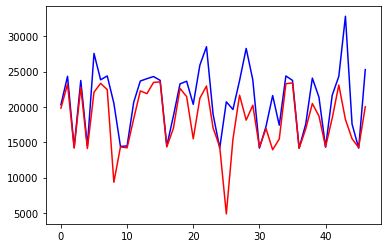

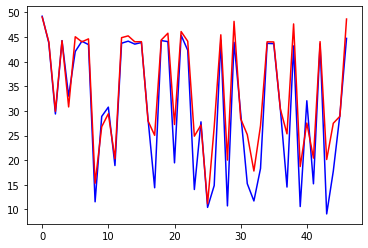

In [29]:
all_datasets = 'C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Dataset\\'
dataset_name_n = all_datasets +  'stitch_physical' + '.csv'
dataset_name = all_datasets +  'stitch_simulated' + '.csv'

df = pd.read_csv(dataset_name)
dfn = pd.read_csv(dataset_name_n)


print(len(df),len(dfn))

encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)
encoded_data_frame_n, encoder_isa_n, encoder_mem_type_n = encode_text_features('encode', dfn, encoder_isa = None, encoder_mem_type=None)

total_data_n = encoded_data_frame_n.drop(columns = ['arch','mem-type_1','mem-type_2','mem-type_3','mem-type_4',
                                                        'isa_1','isa_2' ,'isa_3', 'isa_4', 'bus_speed', 'num-cpu'])
total_data = encoded_data_frame.drop(columns = ['arch','mem-type_1','mem-type_2','mem-type_3','mem-type_4','isa_1',
                                                    'isa_2'])
total_data = total_data.fillna(0)
total_data_n = total_data_n.fillna(0)

X_sim = total_data.drop(columns = ['runtime', 'power']).to_numpy()
Y_sim = total_data[['runtime','power']].to_numpy()
X_phy = total_data_n.drop(columns = ['runtime', 'power']).to_numpy()
Y_phy = total_data_n[['runtime','power']].to_numpy()

print(X_sim.shape, X_phy.shape, Y_sim.shape, Y_phy.shape)

# Separating Physical data to 10% and 90%
X_train_phy, X_test_phy, Y_train_phy, Y_test_phy = train_test_split(X_phy, Y_phy, test_size = 0.90, random_state = 0)
print(X_train_phy.shape, X_test_phy.shape, Y_train_phy.shape, Y_test_phy.shape)

'''X_train_sim = np.append(X_sim, X_train_phy,axis = 0)
Y_train_sim = np.append(Y_sim, Y_train_phy,axis = 0)
print(X_train_sim.shape, Y_train_sim.shape, X_test_phy.shape, Y_test_phy.shape)'''

scaler_X_sim = StandardScaler()
scaler_X_phy = StandardScaler()
scaler_X_sim.fit(X_sim)
scaler_X_phy.fit(X_phy)
X_sim = scaler_X_sim.fit_transform(X_sim)
X_train_phy = scaler_X_phy.transform(X_train_phy)
X_test_phy = scaler_X_phy.transform(X_test_phy)

scaler_Y_sim = StandardScaler()
scaler_Y_phy = StandardScaler()
scaler_Y_sim.fit(Y_sim)
scaler_Y_phy.fit(Y_phy)
# Y_sim = np.reshape(Y_sim, (len(Y_sim),1))
# Y_test_phy = np.reshape(Y_test_phy, (len(Y_test_phy),1))
# Y_train_phy = np.reshape(Y_train_phy, (len(Y_train_phy),1))                   
Y_sim = scaler_Y_sim.transform(Y_sim)
Y_test_phy = scaler_Y_phy.fit_transform(Y_test_phy)
Y_train_phy = scaler_Y_phy.transform(Y_train_phy)


print(X_sim.shape, Y_sim.shape, X_train_phy.shape, Y_train_phy.shape, X_test_phy.shape, Y_test_phy.shape)

'''X_train = X_train_sim
X_test = X_test_phy
Y_train = Y_train_sim
Y_test = Y_test_phy
print('Final Shapes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)'''

model = create_model(input_dim = X_sim.shape[1])
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
print('Fitting Model-----------')
model.fit(X_sim, Y_sim, epochs = 100, batch_size = 5, verbose = 0)
# Freeze the layers except the last 2 dense layers
for layer in model.layers[:-2]:
    layer.trainable = False
    print(layer)

# Check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)
print('Fine Tuning----------')    
model.fit(X_train_phy, Y_train_phy, epochs = 100, batch_size = 5, verbose = 0)    
Y_pred = model.predict(X_test_phy)
'''plt.plot(Y_pred)
plt.plot(Y_test_phy)'''
Y_fold = scaler_Y_phy.inverse_transform(Y_test_phy)
Y_pred = scaler_Y_phy.inverse_transform(Y_pred)

plt.figure()
plt.plot(Y_fold[:,0], 'b')
plt.plot(Y_pred[:,0], 'r')
plt.figure()
plt.plot(Y_fold[:,1], 'b')
plt.plot(Y_pred[:,1], 'r')

'''
plt.figure()
plt.plot(Y_fold, 'b')
plt.plot(Y_pred, 'r')
'''
r2_scores = (r2_score(Y_fold, Y_pred))
# mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores_runtime = (absolute_percentage_error(Y_fold[:,0], Y_pred[:,0]))
mape_scores_power = (absolute_percentage_error(Y_fold[:,1], Y_pred[:,1]))
# mape_scores_power = (absolute_percentage_error(Y_fold, Y_pred))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE Runtime: \n', mape_scores_runtime)
print('\nMAPE Power: \n', mape_scores_power)

 # SVM

390 52
(390, 16) (52, 16) (390, 2) (52, 2)
(5, 16) (47, 16) (5, 2) (47, 2)
(390, 16) (390, 2) (5, 16) (5, 2) (47, 16) (47, 2)
Fitting Model-----------
<keras.layers.core.Dense object at 0x0000003670FC84E0> False
<keras.layers.core.Dense object at 0x000000366DD8B518> False
<keras.layers.core.Dense object at 0x000000366E2A66A0> True
<keras.layers.core.Dense object at 0x0000003672BA18D0> True
Fine Tuning----------


C:\Users\Rajat\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


MSE: 
 563255.3915363326

R2: 
 -0.1346380802297627

MAPE Runtime: 
 0.09102235595642494

MAPE Power: 
 0.23377672347235093


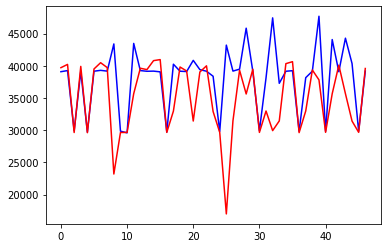

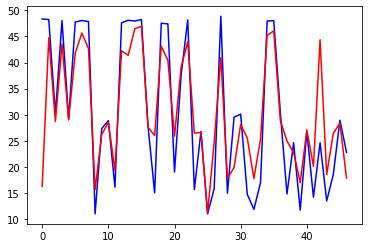

In [31]:
all_datasets = 'C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Dataset\\'
dataset_name_n = all_datasets +  'svm_physical' + '.csv'
dataset_name = all_datasets +  'svm_simulated' + '.csv'

df = pd.read_csv(dataset_name)
dfn = pd.read_csv(dataset_name_n)


print(len(df),len(dfn))

encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)
encoded_data_frame_n, encoder_isa_n, encoder_mem_type_n = encode_text_features('encode', dfn, encoder_isa = None, encoder_mem_type=None)

total_data_n = encoded_data_frame_n.drop(columns = ['arch','mem-type_1','mem-type_2','mem-type_3','mem-type_4',
                                                        'isa_1','isa_2' ,'isa_3', 'isa_4', 'bus_speed', 'num-cpu'])
total_data = encoded_data_frame.drop(columns = ['arch','mem-type_1','mem-type_2','mem-type_3','mem-type_4','isa_1',
                                                    'isa_2'])
total_data = total_data.fillna(0)
total_data_n = total_data_n.fillna(0)

X_sim = total_data.drop(columns = ['runtime', 'power']).to_numpy()
Y_sim = total_data[['runtime','power']].to_numpy()
X_phy = total_data_n.drop(columns = ['runtime', 'power']).to_numpy()
Y_phy = total_data_n[['runtime','power']].to_numpy()

print(X_sim.shape, X_phy.shape, Y_sim.shape, Y_phy.shape)

# Separating Physical data to 10% and 90%
X_train_phy, X_test_phy, Y_train_phy, Y_test_phy = train_test_split(X_phy, Y_phy, test_size = 0.90, random_state = 0)
print(X_train_phy.shape, X_test_phy.shape, Y_train_phy.shape, Y_test_phy.shape)

'''X_train_sim = np.append(X_sim, X_train_phy,axis = 0)
Y_train_sim = np.append(Y_sim, Y_train_phy,axis = 0)
print(X_train_sim.shape, Y_train_sim.shape, X_test_phy.shape, Y_test_phy.shape)'''

scaler_X_sim = StandardScaler()
scaler_X_phy = StandardScaler()
scaler_X_sim.fit(X_sim)
scaler_X_phy.fit(X_phy)
X_sim = scaler_X_sim.fit_transform(X_sim)
X_train_phy = scaler_X_phy.transform(X_train_phy)
X_test_phy = scaler_X_phy.transform(X_test_phy)

scaler_Y_sim = StandardScaler()
scaler_Y_phy = StandardScaler()
scaler_Y_sim.fit(Y_sim)
scaler_Y_phy.fit(Y_phy)
# Y_sim = np.reshape(Y_sim, (len(Y_sim),1))
# Y_test_phy = np.reshape(Y_test_phy, (len(Y_test_phy),1))
# Y_train_phy = np.reshape(Y_train_phy, (len(Y_train_phy),1))                   
Y_sim = scaler_Y_sim.transform(Y_sim)
Y_test_phy = scaler_Y_phy.fit_transform(Y_test_phy)
Y_train_phy = scaler_Y_phy.transform(Y_train_phy)


print(X_sim.shape, Y_sim.shape, X_train_phy.shape, Y_train_phy.shape, X_test_phy.shape, Y_test_phy.shape)

'''X_train = X_train_sim
X_test = X_test_phy
Y_train = Y_train_sim
Y_test = Y_test_phy
print('Final Shapes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)'''

model = create_model(input_dim = X_sim.shape[1])
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
print('Fitting Model-----------')
model.fit(X_sim, Y_sim, epochs = 100, batch_size = 5, verbose = 0)
# Freeze the layers except the last 2 dense layers
for layer in model.layers[:-2]:
    layer.trainable = False
    print(layer)

# Check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)
print('Fine Tuning----------')    
model.fit(X_train_phy, Y_train_phy, epochs = 100, batch_size = 5, verbose = 0)    
Y_pred = model.predict(X_test_phy)
'''plt.plot(Y_pred)
plt.plot(Y_test_phy)'''
Y_fold = scaler_Y_phy.inverse_transform(Y_test_phy)
Y_pred = scaler_Y_phy.inverse_transform(Y_pred)

plt.figure()
plt.plot(Y_fold[:,0], 'b')
plt.plot(Y_pred[:,0], 'r')
plt.figure()
plt.plot(Y_fold[:,1], 'b')
plt.plot(Y_pred[:,1], 'r')

'''
plt.figure()
plt.plot(Y_fold, 'b')
plt.plot(Y_pred, 'r')
'''
r2_scores = (r2_score(Y_fold, Y_pred))
# mse_scores = (mean_squared_error(Y_fold, Y_pred))
mape_scores_runtime = (absolute_percentage_error(Y_fold[:,0], Y_pred[:,0]))
mape_scores_power = (absolute_percentage_error(Y_fold[:,1], Y_pred[:,1]))
# mape_scores_power = (absolute_percentage_error(Y_fold, Y_pred))
print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE Runtime: \n', mape_scores_runtime)
print('\nMAPE Power: \n', mape_scores_power)